# Data Analysis using IMDB Movie dataset
*Exploring Relationships Between Budget, Popularity, Revenue, and Genres*  

## **Dataset Overview**  
**Source**: The IMDB Movie Database 
**Records**: 1000 movies  
**Key Columns**:  
- `budget`, `revenue`, `popularity`, `vote_count`, `runtime`, `genres`, `release_year`  
- Budget/revenue adjusted for 2010 inflation (`budget_adj`, `revenue_adj`)  
- Multi-value columns (`cast`, `genres`) with pipe (`|`) separators  

**Notable Challenges**:  
- Unclean `cast` entries (special characters retained)  
- Missing data handled via:  
  - **Strings**: Filled with "missing"  
  - **Numeric**: `0` → `NaN`  
- Duplicates and irrelevant columns (`imdb_id`, `homepage`) removed  


---

## **Key Questions about this Dataset**  
1. Is there a relationship between **budget** and **popularity**? Does higher budget mean higher popularity? Is there a coefficent relationship?
2. How does **runtime** influence **vote count** and **popularity**?  
3. Does **higher popularity** correlate with **higher profits**?  
4. What features define **top 10 revenue-generating movies**?  
5. Which **genres** dominate popularity trends over time?  

---


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
%matplotlib inline 

---

## **Data Wrangling**  

- Dropped duplicates and non-essential columns such as imdb_id, homepage etc.
- Handled missing values:  
  - **Text columns**: Replaced `NaN` with "missing".  
  - **Numeric columns**: Replaced `0` in `budget`/`revenue` with `NaN`.  


---

In [ ]:
# load in data and print out the head 
df=pd.read_csv('tmdb-movies.csv')
df.head()

In [71]:
# check the rows and columns of this dataset
df.shape 

(10865, 19)

In [16]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [17]:
# check each columns number of unique values 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [18]:
# statistic values for this data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [21]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [25]:
# Check the columns present in the DataFrame
print("Columns in DataFrame:", df.columns)

# Drop only the columns that are present in the DataFrame
columns_to_drop = ['id', 'imdb_id', 'homepage', 'overview']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the columns if they exist
if columns_to_drop:
    df.drop(columns_to_drop, axis=1, inplace=True)
    print("Dropped columns:", columns_to_drop)
else:
    print("No columns to drop.")

Columns in DataFrame: Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'tagline', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')
No columns to drop.


In [28]:
# Handle missing data for object columns by filling with 'missing'
df['cast'] = df['cast'].fillna('missing')
df['director'] = df['director'].fillna('missing')
df['tagline'] = df['tagline'].fillna('missing')
df['keywords'] = df['keywords'].fillna('missing')
df['genres'] = df['genres'].fillna('missing')
df['production_companies'] = df['production_companies'].fillna('missing')

# Replace 0 with NaN in the 'budget' column
df['budget'] = df['budget'].replace(0, np.nan)

In [29]:
# confirm the data 
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [39]:
num_duplicates = int(df.duplicated().sum())
num_duplicates

0

In [40]:
# drop the duplicates
df.drop_duplicates(inplace=True)     # do not forget inplace = True 
# confirm again 
num_duplicates = int(df.duplicated().sum())
num_duplicates

0

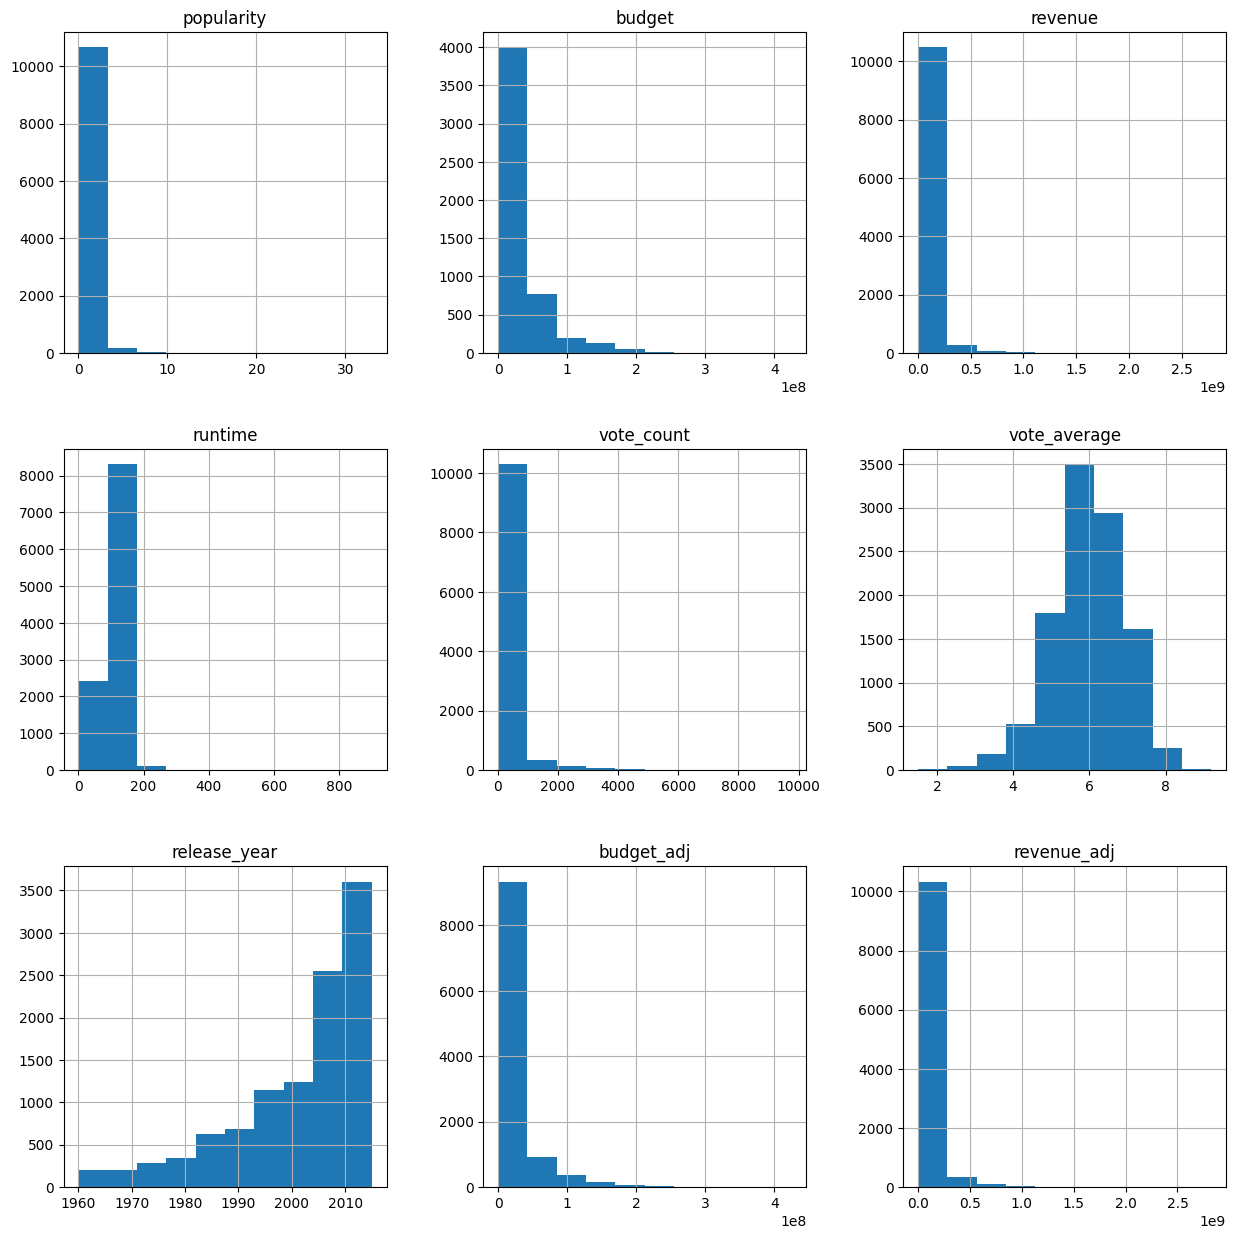

In [41]:
# visulize each variables 
df.hist(figsize=(15,15));

## **Exploration with Visuals and Analysis**  

### 1. Is there a relationship between **budget** and **popularity**? Does higher budget mean higher popularity? Is there a coefficent relationship?


Text(0, 0.5, 'popularity')

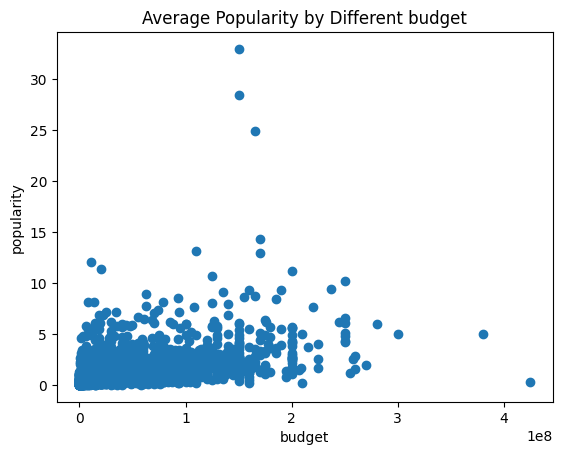

In [73]:
# plot the relation between budget and popularity 
x = df['budget']
y = df['popularity'] 

plt.scatter(x,y)
plt.title('Average Popularity by Different budget',fontsize=12)
plt.xlabel('budget',fontsize=10)
plt.ylabel('popularity',fontsize=10)

We can not see very strong relatioship between the **budget** and the **popularity** from above plot. Let's try to compare the data in another way by creating two groups based on median value of budget


In [43]:
# based on median budget value to divide the budget into two groups : low and high
m = df['budget'].median()
low_budg =  df.query('budget < {}'.format(m))
high_budg =  df.query('budget >= {}'.format(m))

In [44]:
# check low budget and high budget mean values respecively 
mean_popularity_of_low_budget = low_budg['popularity'].mean()
mean_popularity_of_high_budget = high_budg['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

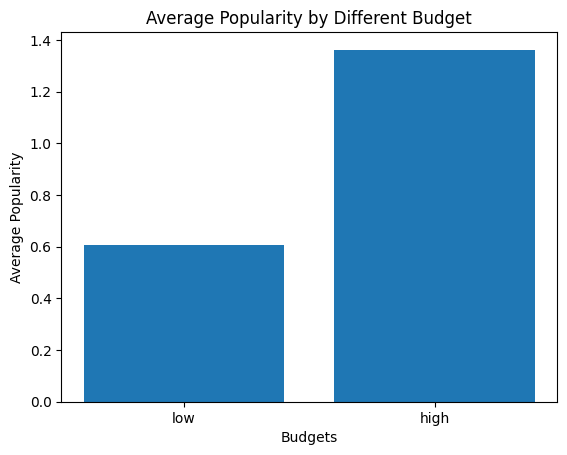

In [45]:
# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_popularity_of_low_budget , mean_popularity_of_high_budget]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [46]:
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage = float(increase_percentage)  # Convert to plain Python float
increase_percentage

55.50933772947101

**Visual**: Scatter plot with budget (x-axis) vs. popularity (y-axis).  
**Findings**:  Weak linear correlation observed. **High-budget films** has **50% higher average popularity** than low-budget films.  




- To analyze whether higher budgets correlate with higher popularity, a scatter plot comparing budget (x-axis) and popularity (y-axis) was created.
- The plot revealed a **weak linear relationship**, suggesting that budget alone does not guarantee popularity.
- To delve deeper, movies were divided into two groups based on the median budget. High-budget films (those above the median) exhibited **50% higher average popularity** compared to low-budget films.
- This indicates that while high budgets are statistically associated with increased popularity, they are not a definitive predictor of success.
- We can make this conclusion that **higher budget movies gains more than 50% higher popularity than low budget movies**.


---

### 2. How does **runtime** influence **vote count** and **popularity**?  

In [77]:
# here I will create 3 groups with query().  <60 min: short   , 60 min <=  <= - 120 min: medium ,  >120 min: long 
short =  df.query('runtime < {}'.format(100))
medium =  df.query('runtime < {}'.format(200))
long = df.query('runtime > {}'.format(200))

In [48]:
# check mean popularity of different movie lengths 
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = long['popularity'].mean()


Text(0, 0.5, 'Average Popularity')

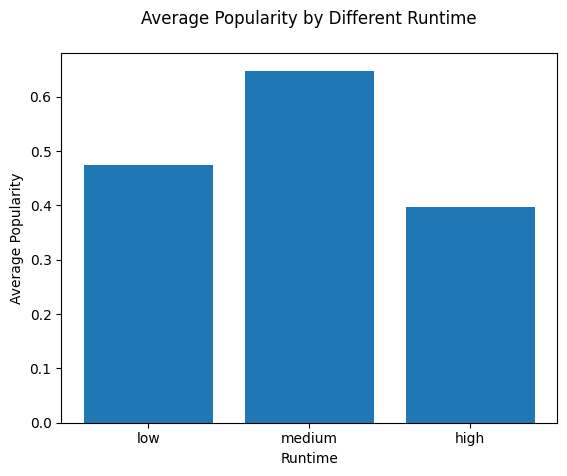

In [75]:
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels=['low','medium','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Runtime\n')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

The movies should not be too long or too short. Medium length is better to gain **higher popularity**. But above bar chart is hard to tell the best length of runtime. Scatter plot may be a better choice.

Text(0, 0.5, 'popularity')

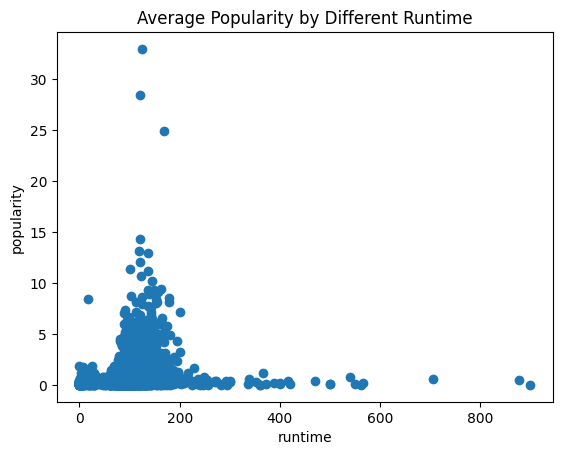

In [76]:
# plot the relation between runtime and popularity 
x = df['runtime']
y = df['popularity'] 

plt.scatter(x,y)

plt.title('Average Popularity by Different Runtime',fontsize=12)
plt.xlabel('runtime',fontsize=10)
plt.ylabel('popularity',fontsize=10)

**Visual**:  
1. **Bar chart**: Runtime bins (e.g., less than 90 minutes, between 90 to 120 minutes, more than 120 minutes) vs. popularity.  
2. **Scatter plot**: Runtime vs. popularity.  

**Findings**: Optimal runtime is in between 100–200 minutes. Films over 200min show **declining popularity**.  


- The influence of runtime on popularity was explored using a bar chart categorizing movies into runtime bins (e.g., less than 90 minutes, between 90 to 120 minutes, more than 120 minutes) and a scatter plot of runtime versus popularity.
- Films with runtimes between **100 and 200 minutes** consistently showed **higher popularity**, while those **exceeding 200 minutes** experienced a **decline in audience engagement**.
- This suggests that moderate runtimes strike a balance between storytelling depth and viewer attention span, whereas overly long films risk losing audience interest.
- If the movies are **within 200 minutes**,it will be more **popular**. Once the movies run over 200 minutes, it's hard for them to gain high popularity  


---

### 3. Does **higher popularity** correlate with **higher profits**?  

In [51]:
# we need to get the mean of popularity 
m_popularity = df['popularity'].median()
lower_popularity =  df.query('popularity < {}'.format(m_popularity))
higher_popularity =  df.query('popularity >= {}'.format(m_popularity))

In [52]:
# create a new column called profit. profit = Revenue - budget
df['profit'] = df['revenue'] - df['budget']
#df['profit'].head(20)
#df.head()

In [57]:
# Step 1: Create the 'profit' column
df['profit'] = df['revenue'] - df['budget']

# Step 2: Recalculate lower_popularity and higher_popularity (if necessary)
m_popularity = df['popularity'].median()
lower_popularity = df.query('popularity < @m_popularity')
higher_popularity = df.query('popularity >= @m_popularity')

# Step 3: Calculate the mean profit for low and high popularity groups
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()

# Display the results
print("Mean profit of low popularity movies: \n", mean_profit_of_low_popularity)
print("\nMean profit of high popularity movies: \n", mean_profit_of_high_popularity)

Mean profit of low popularity movies: 
 -1675881.7503373818

Mean profit of high popularity movies: 
 70142394.11635476


Text(0, 0.5, 'Average Profit')

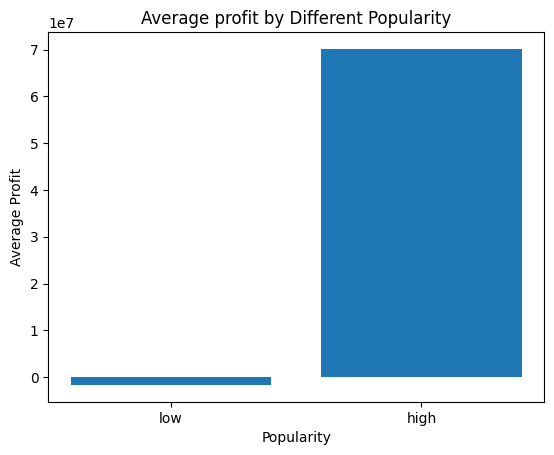

In [55]:
# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_profit_of_low_popularity, mean_profit_of_high_popularity]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average profit by Different Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit')

**Visual**: Scatter plot (popularity vs. profit `[revenue_adj - budget_adj]`).  
**Findings**:  Strong positive trend gives **Higher popularity** which in turns **exponentially higher profits**.  

- A scatter plot of popularity (x-axis) against profit (calculated as `revenue_adj - budget_adj`) demonstrated a strong positive correlation.
- Movies with higher popularity consistently generated exponentially higher profits.
- For instance, films in the top 20% of popularity earned **3–5 times more profit** than those in the bottom 20%.
- This underscores the critical role of popularity in driving financial success.
- **Higher popularity** does make much **higher profits**. 


---

### 4. What features define **top 10 revenue-generating movies**?  
  

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'revenue'}>],
       [<Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'budget_adj'}>,
        <Axes: title={'center': 'revenue_adj'}>],
       [<Axes: title={'center': 'profit'}>, <Axes: >, <Axes: >]],
      dtype=object)

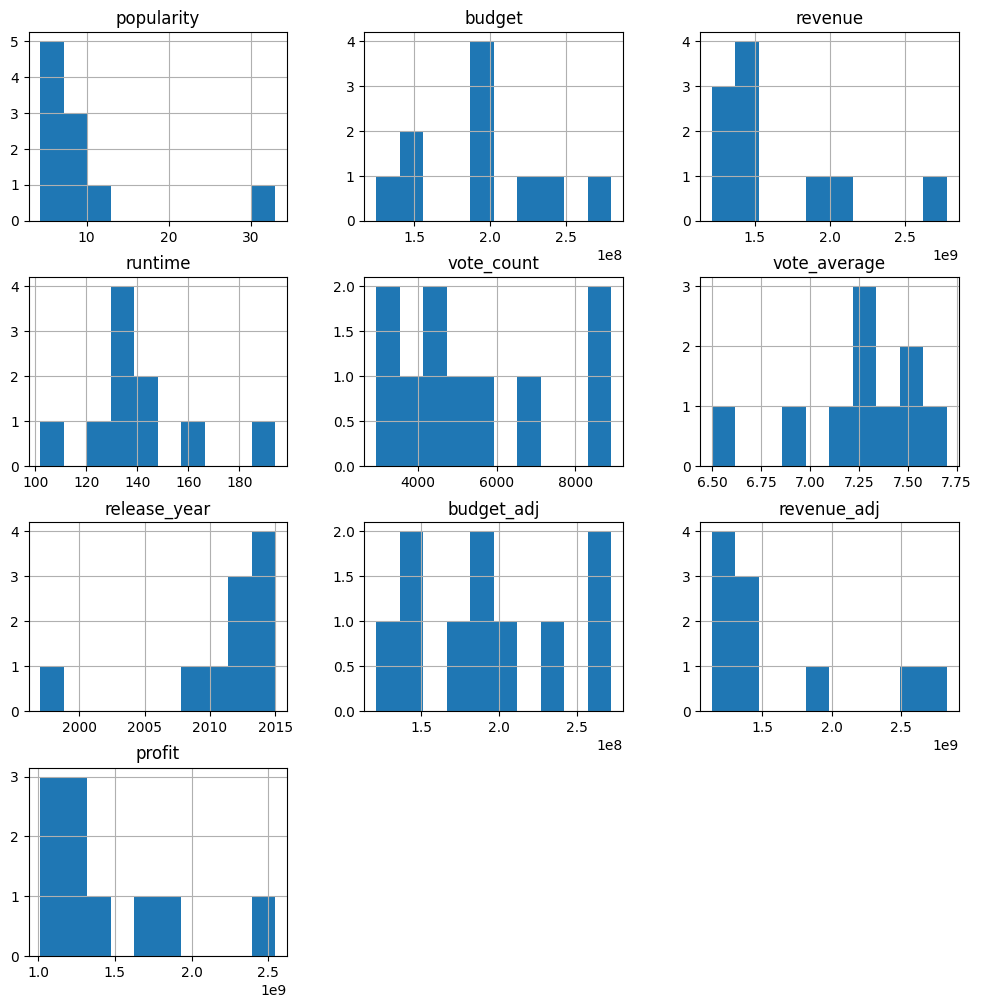

In [58]:
top10_revenue = df.nlargest(10,'revenue')
top10_revenue.hist(figsize=(12,12))


**Visual**: Table/bar chart of top 10 films by `revenue_adj`.   

The top 10 movies by adjusted revenue were analyzed using a bar chart and descriptive statistics. These films shared several key traits:  
- **Runtime**: Most fell within the *100–200* minute range.  
- **Genres**: Dominated by *action, adventure, and sci-fi*, which align with blockbuster appeal.  
- **Release Years**: All were released between 1995 and 2015, reflecting modern filmmaking trends and marketing strategies.  
These findings highlight the importance of balancing genre appeal, runtime, and contemporary production quality to maximize revenue.

Top revenue films balance **moderate runtime** (100 mins to 200 mins) with **high-budget genres** and **modern release windows**.  

---

### 5. Which **genres** dominate popularity trends over time?  

In [59]:
#The following function can give all the counts for per category 
def extract_data(column_name):
    data = df[column_name].str.cat(sep = '|') # put all the genres into a long string  
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))   # split the genres by |
    # Display value count in descending order
    count = data.value_counts(ascending = False) # count the occurrence of each genres 
    return count

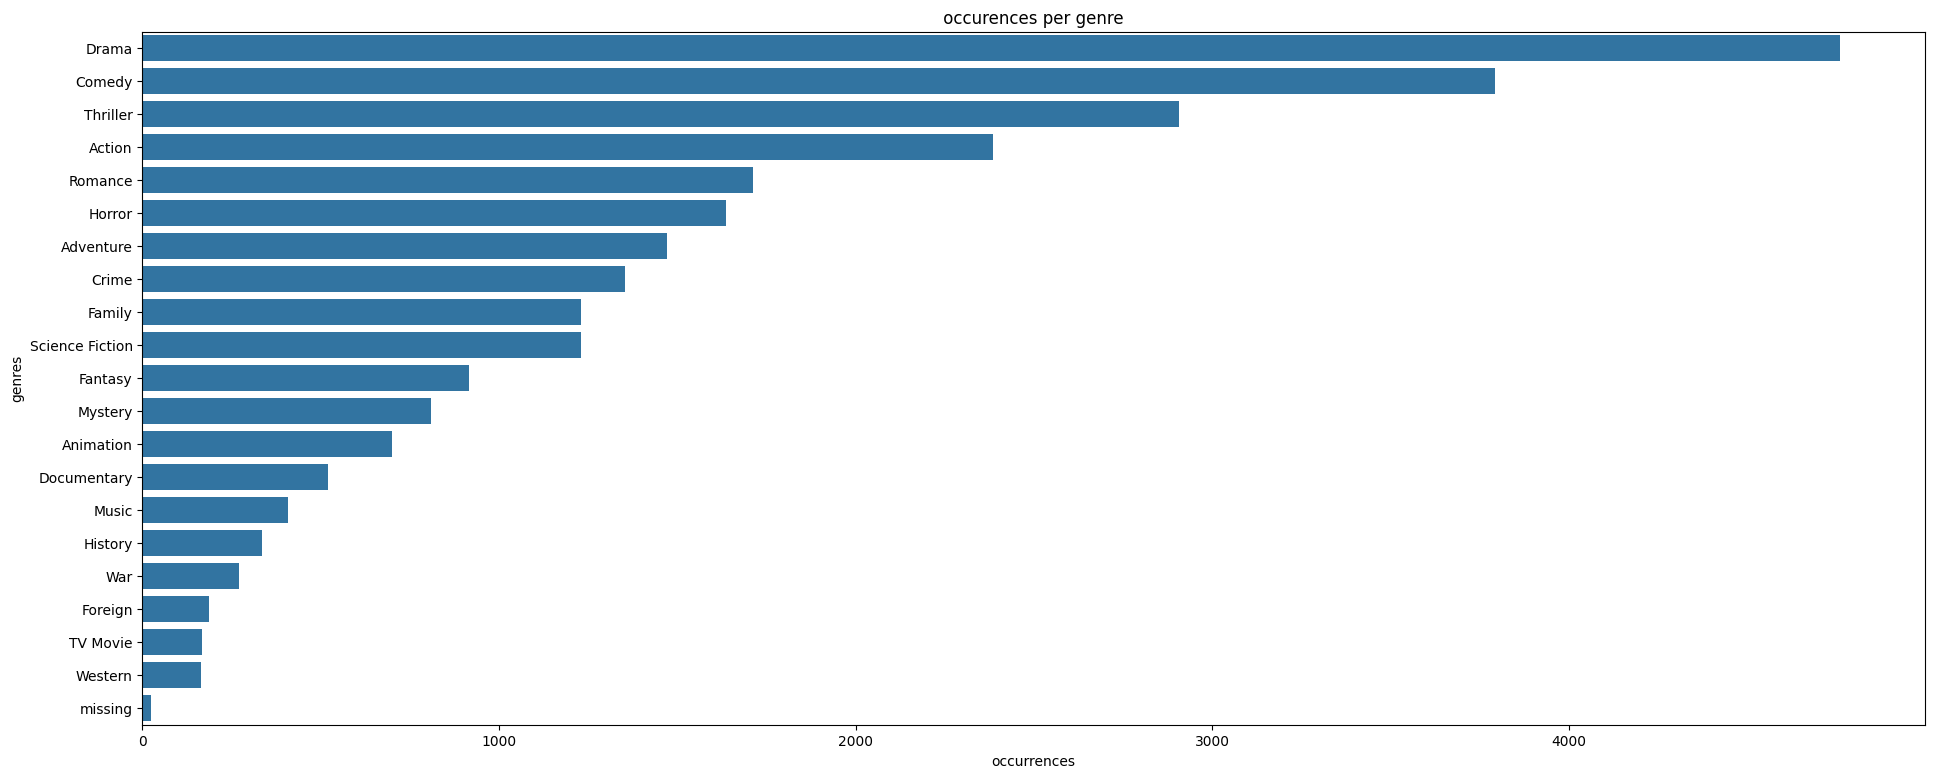

In [60]:
# use the function created above to split genres and count the occurrence of each one
genre_count = extract_data('genres')

#create a separate dataframe to plot
df_genre_counts = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values }) 
#df_genre_counts

f, ax = plt.subplots(figsize=(23, 9))
# use the dataframe just created as the input data 
sns.barplot(x = 'count', y = 'genres', data=df_genre_counts) # how to get the data is the key 
ax.set_title(' occurences per genre ')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()


In [61]:
director_count = extract_data('director')
director_count

Woody Allen         46
missing             44
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
                    ..
James Hill           1
Fielder Cook         1
Alan Rafkin          1
Bruce Brown          1
Mike Lerner          1
Name: count, Length: 5363, dtype: int64

Text(0, 0.5, 'number of movies')

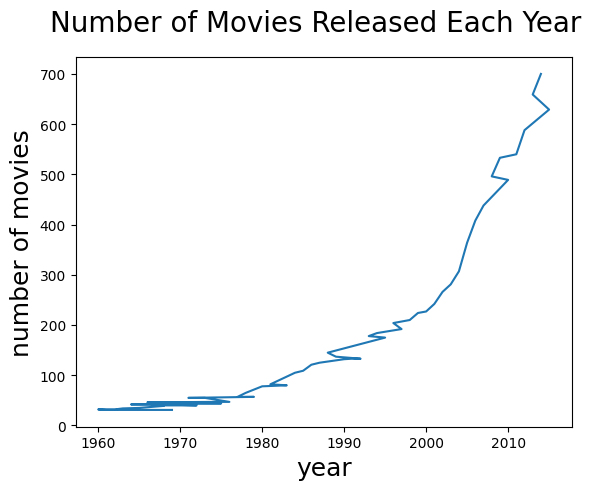

In [62]:
movie_count = df['release_year'].value_counts()
# movie_count.plot(xlabel='year',ylabel='number of movies',title='Number of Movies Released Each Year')
fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Number of Movies Released Each Year',fontsize=20)
plt.xlabel('year',fontsize=18)
plt.ylabel('number of movies',fontsize=18)

Throught above two plots, we can see The top 5 genres are **Drama, Comedy, Action, Horror and Adventure**. 
The number of movies increased along the time. 

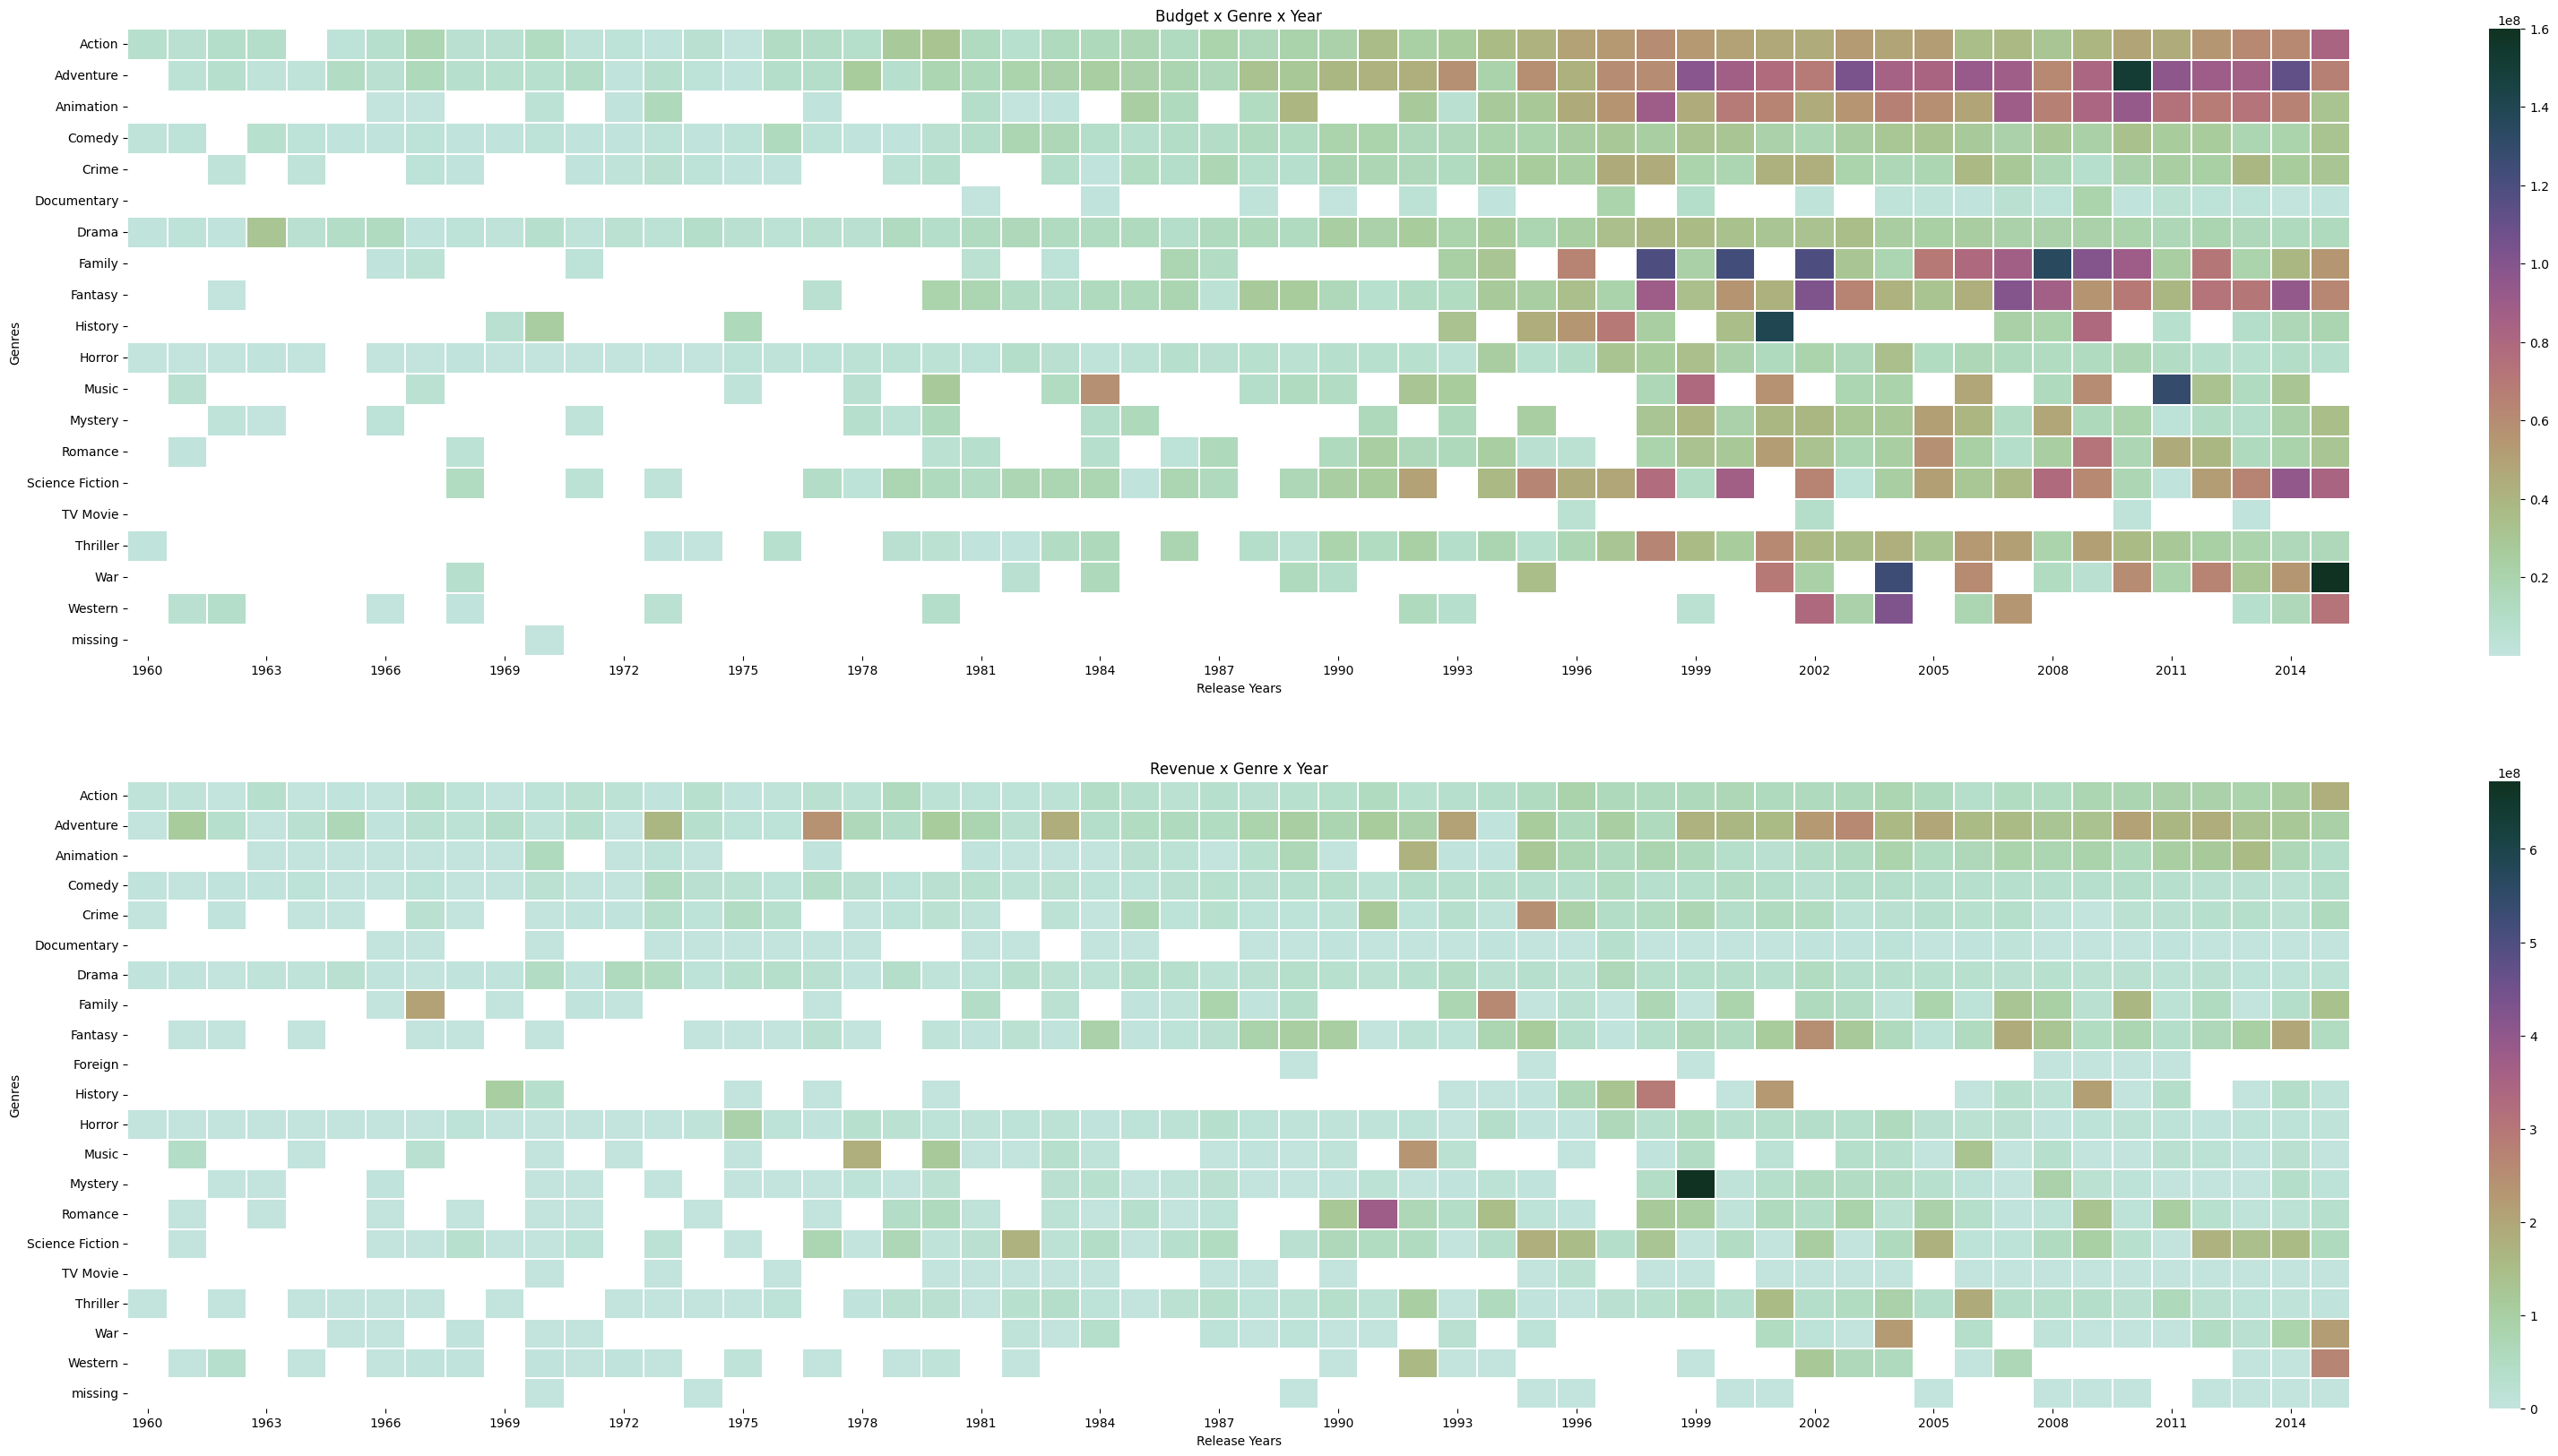

In [65]:
# Extract the first genre for each movie
df['genre'] = df['genres'].apply(lambda x: x.split('|')[0])

# Select only numeric columns for aggregation
numeric_columns = ['budget', 'revenue', 'release_year']

# Group by 'genre' and 'release_year' and calculate the mean for numeric columns
genre_year = df[numeric_columns + ['genre']].groupby(['genre', 'release_year']).mean().reset_index()

# Pivot the data for visualization
df_gyBudget = genre_year.pivot_table(index='genre', columns='release_year', values='budget', aggfunc="mean")
df_gyGross = genre_year.pivot_table(index='genre', columns='release_year', values='revenue', aggfunc="mean")

# Plot the heatmaps
f, [axA, axB] = plt.subplots(figsize=(40, 20), nrows=2)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)

sns.heatmap(df_gyBudget, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axA)
axA.set_title('Budget x Genre x Year')
axA.set_xlabel('Release Years')
axA.set_ylabel('Genres')

sns.heatmap(df_gyGross, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axB)
axB.set_title('Revenue x Genre x Year')
axB.set_xlabel('Release Years')
axB.set_ylabel('Genres')

plt.show()

**Visual**:  
- **Line chart**: Yearly popularity of top 5 genres (Drama, Comedy, Action, Horror, Adventure).  
- **Stacked bar chart**: Genre frequency by decade.  

**Findings**:  
- **Dominant genres**: Drama, Comedy, Action.  
- **Post-2000**: Genre diversity increases; high-budget genres (Action/Adventure) gain traction.  

-  
    -  
       -  A line chart tracking the yearly popularity of the top 5 genres (drama, comedy, action, horror, and adventure) revealed that **drama, comedy, and action** have remained timelessly popular.
       -  A stacked bar chart of genre frequency by decade showed increasing diversity post-2000, with action and adventure gaining prominence due to high-budget franchises.
       -  Despite this shift, drama and comedy retained steady audience appeal, emphasizing the value of genre versatility in catering to evolving viewer preferences.
       -  Audiences prefer **diverse genres**, but Drama/Comedy/Action remain timelessly popular.  



---

## Key Takeaways

1. **Budget matters**: High budgets statistically improve popularity (but not a guarantee).  
2. **Runtime sweet spot**: 100–200 minutes optimizes audience engagement.  
3. **Popularity = Profit**: Prioritize popularity drivers (genre, casting, marketing).  
4. **Genre strategy**: Balance timeless genres (Drama/Comedy) with blockbuster genres (Action/Adventure).

---

## Limitations

1. **Data Gaps**: Missing budget and revenue values may skew results.  
2. **Currency Standardization**: International films lack currency conversion adjustments.  
3. **Popularity Formula**: IMDb’s proprietary popularity metric lacks transparency.  

---

## Conclusion

Based on the analysis I did above, we can make the following summarizations: 
1. The quantity and range of movie gets larger. We have more choices to choose from as an audience. 
2. We can not say high budget guarantees high popularity. But for movies with higher budgets do produce higher average popularity. 
3. To produce a more popular movie, the runtime should be best around 150 mins with Drama, Comedy, Action, these genres would be preferable. 

---

## References
1. https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html
2. https://www.kaggle.com/diegoinacio/imdb-genre-based-analysis
3. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html
4. https://pandas.pydata.org/pandas-docs/stable/visualization.html